<a href="https://colab.research.google.com/github/astridVanessa/astridVanessa.github.io/blob/main/proyecto_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   extroversión  amabilidad  conciencia  neuroticismo   apertura  felicidad  \
0     54.967142   63.993554   43.248217     30.921924  41.365064  45.762403   
1     48.617357   59.246337   48.554813     41.396150  49.687965  45.465859   
2     56.476885   50.596304   42.075801     45.863945  50.180169  32.043568   
3     65.230299   43.530632   46.920385     68.876877  54.726303  46.699098   
4     47.658466   56.982233   31.063853     55.565531  36.331416  57.328291   

  personalidad  
0       Tipo B  
1       Tipo A  
2       Tipo C  
3       Tipo B  
4       Tipo C  


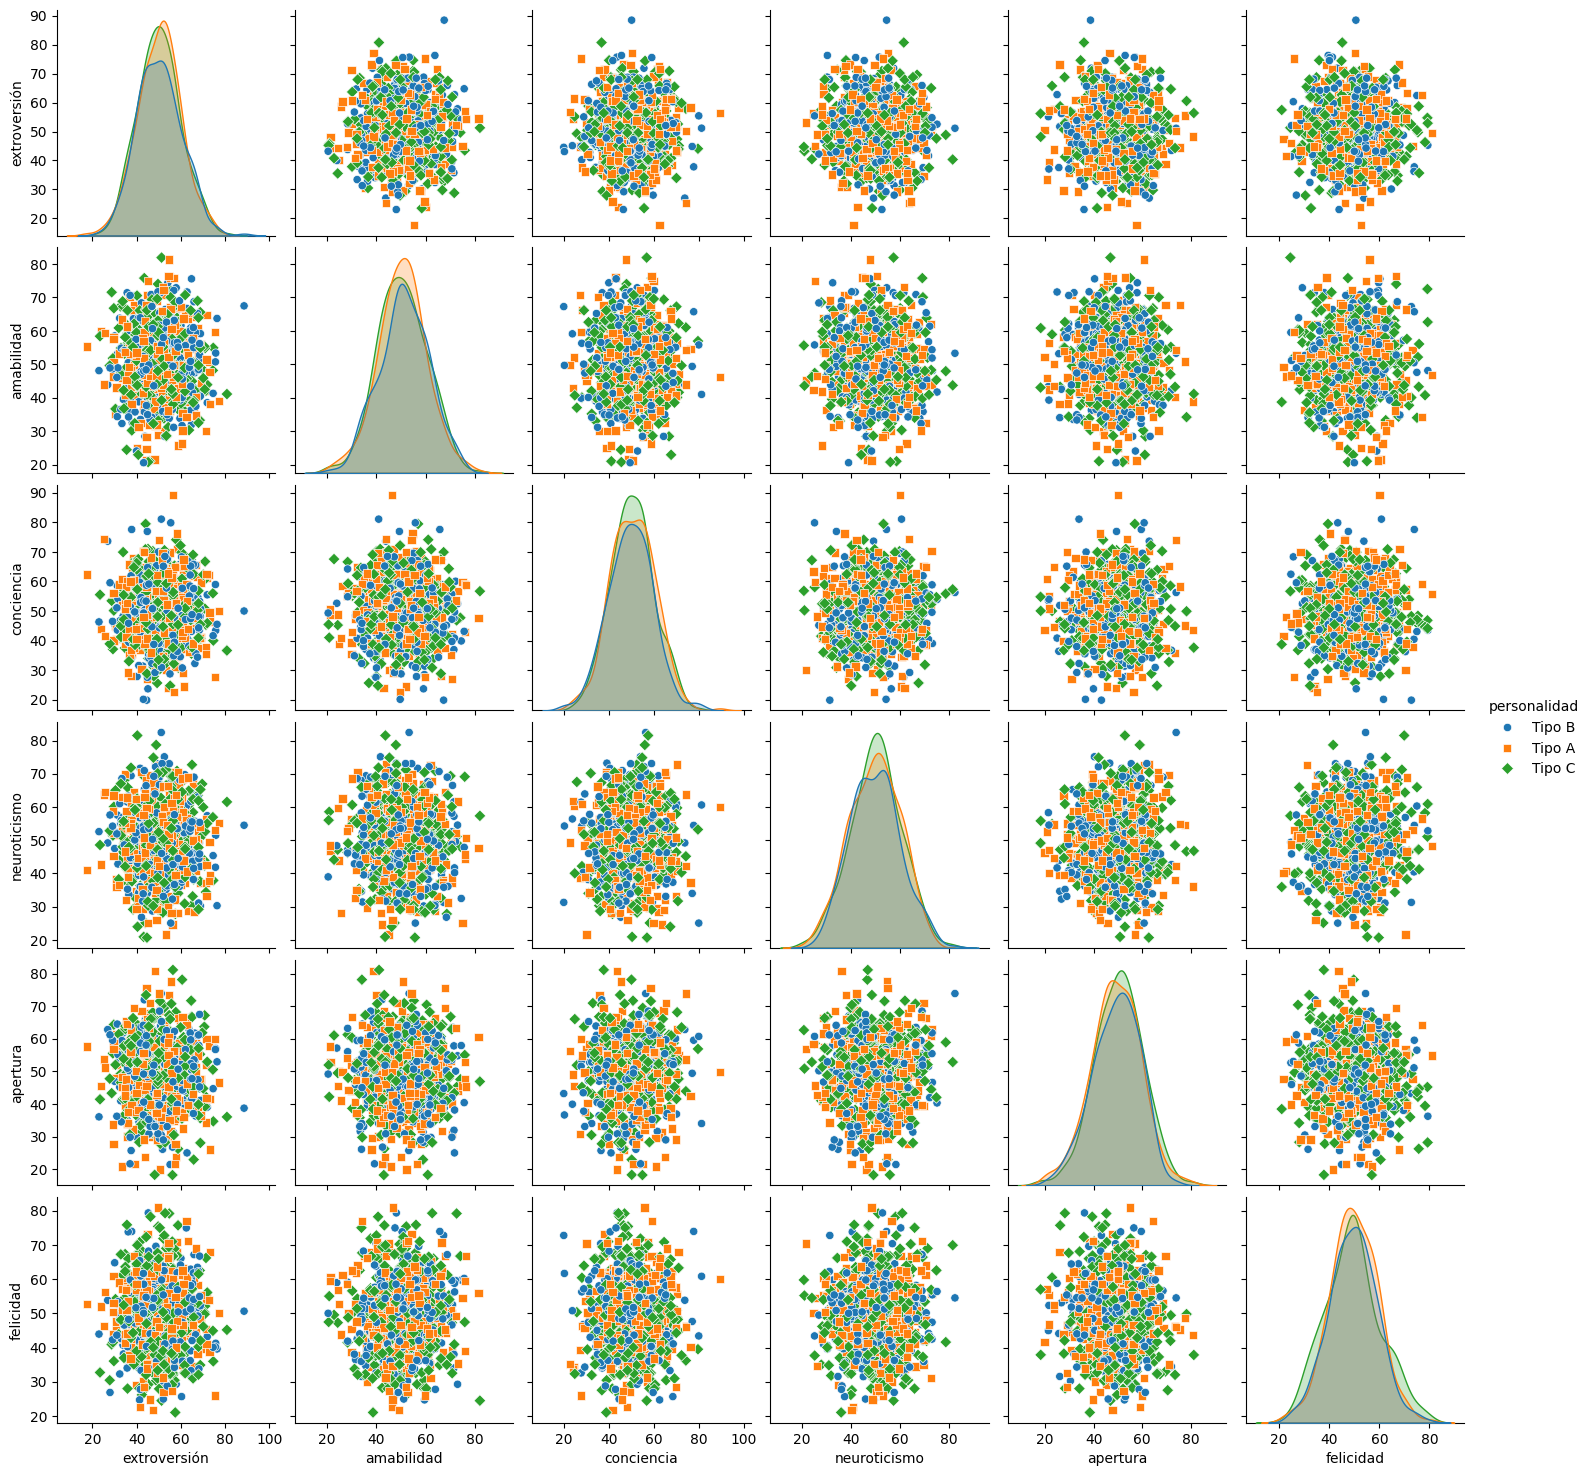

Precisión del modelo: 0.34
Reporte de Clasificación:
              precision    recall  f1-score   support

      Tipo A       0.32      0.46      0.38        63
      Tipo B       0.39      0.24      0.29        68
      Tipo C       0.33      0.33      0.33        69

    accuracy                           0.34       200
   macro avg       0.35      0.34      0.34       200
weighted avg       0.35      0.34      0.33       200

Matriz de Confusión:
[[29 13 21]
 [27 16 25]
 [34 12 23]]

Agregando datos para el nuevo registro 1


In [ ]:
# 1. Instalación de Bibliotecas (Si aún no están instaladas, descomentar las siguientes líneas)
# !pip install numpy pandas scikit-learn seaborn matplotlib

# 2. Importación de Bibliotecas
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 3. Generación de Datos Simulados
# Suponemos que tenemos 6 características relacionadas con la personalidad
np.random.seed(42)
num_samples = 1000

# Generamos datos aleatorios para las características
data = {
    'extroversión': np.random.normal(loc=50, scale=10, size=num_samples),
    'amabilidad': np.random.normal(loc=50, scale=10, size=num_samples),
    'conciencia': np.random.normal(loc=50, scale=10, size=num_samples),
    'neuroticismo': np.random.normal(loc=50, scale=10, size=num_samples),
    'apertura': np.random.normal(loc=50, scale=10, size=num_samples),
    'felicidad': np.random.normal(loc=50, scale=10, size=num_samples),
}

# Asignamos etiquetas de clasificación (3 categorías de personalidad)
labels = np.random.choice(['Tipo A', 'Tipo B', 'Tipo C'], size=num_samples)

# Convertimos a DataFrame
df = pd.DataFrame(data)
df['personalidad'] = labels

# Mostrar las primeras filas del DataFrame
print(df.head())

# Exploración básica
sns.pairplot(df, hue='personalidad', markers=["o", "s", "D"])
plt.show()

# 4. Preprocesamiento de Datos (Normalización)
X = df.drop('personalidad', axis=1)
y = df['personalidad']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. División del Conjunto de Datos
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 6. Entrenamiento del Modelo (Bosque Aleatorio)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 7. Evaluación del Modelo
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.2f}")

# Reporte de Clasificación y Matriz de Confusión
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

# 8. Espacio para Agregar Nuevos Datos de Entrenamiento
def agregar_nuevos_datos():
    nuevos_datos = {
        'extroversión': [],
        'amabilidad': [],
        'conciencia': [],
        'neuroticismo': [],
        'apertura': [],
        'felicidad': [],
        'personalidad': []
    }

    num_nuevos = int(input("¿Cuántos nuevos datos quieres agregar? "))
    for i in range(num_nuevos):
        print(f"\nAgregando datos para el nuevo registro {i + 1}")
        nuevos_datos['extroversión'].append(float(input("Extroversión: ")))
        nuevos_datos['amabilidad'].append(float(input("Amabilidad: ")))
        nuevos_datos['conciencia'].append(float(input("Conciencia: ")))
        nuevos_datos['neuroticismo'].append(float(input("Neuroticismo: ")))
        nuevos_datos['apertura'].append(float(input("Apertura: ")))
        nuevos_datos['felicidad'].append(float(input("Felicidad: ")))
        nuevos_datos['personalidad'].append(input("Personalidad (Tipo A, Tipo B, Tipo C): "))

    return pd.DataFrame(nuevos_datos)

# Llamada para agregar nuevos datos
nuevos_datos_df = agregar_nuevos_datos()

# Agregar nuevos datos al DataFrame original
df = pd.concat([df, nuevos_datos_df], ignore_index=True)

# Normalización de todos los datos (originales + nuevos)
X = df.drop('personalidad', axis=1)
y = df['personalidad']
X_scaled = scaler.fit_transform(X)

# Nueva división del conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Reentrenar el modelo con los datos actualizados
model.fit(X_train, y_train)

# Re-evaluar el modelo
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo después de agregar nuevos datos: {accuracy:.2f}")

# Nuevo reporte de clasificación y matriz de confusión
print("Nuevo Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

print("Nueva Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))
